In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

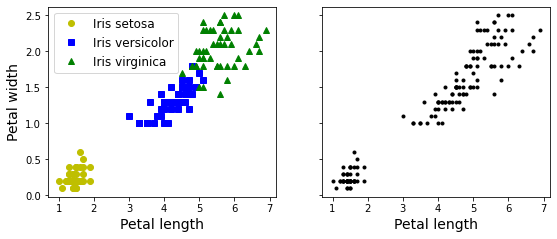

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [4]:
# Gaussian mixture to separate with petal length & width and sepal length & width
from sklearn.mixture import GaussianMixture

In [5]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [6]:
from scipy import stats
# map each cluster to a class
mapping = {}
for class_id in np.unique(y):
#     print(class_id)
    # status mode picks most common class for each cluster
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [7]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
# print(y_pred)

In [8]:
# X

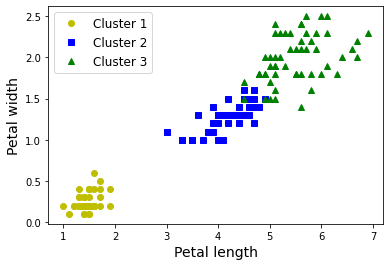

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()


In [10]:

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [12]:


def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

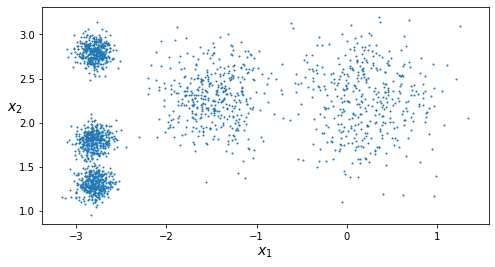

In [13]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [14]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [15]:
y_pred

array([4, 2, 0, ..., 3, 0, 2])

In [16]:
y_pred is kmeans.labels_

True

In [17]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [18]:

X_new = np.array([[0, 2], [1, 2], [-1, 4], [-3, 5]])
kmeans.predict(X_new)

array([0, 0, 1, 3])

In [19]:
# soft clustering
# displays distance from centroids
kmeans.transform(X_new)

array([[0.32995317, 1.49439034, 2.81093633, 2.9042344 , 2.88633901],
       [0.83147037, 2.48330311, 3.80908853, 3.87561396, 3.86415653],
       [2.12234346, 1.77656881, 2.8440905 , 2.15942789, 3.24451805],
       [4.22236512, 3.11725939, 3.20482545, 2.21329963, 3.7045567 ]])

In [20]:
# if you know approx. centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
ikmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

# n_init = number of random initializations

In [21]:
y_predict = ikmeans.fit_predict(X)

In [22]:
kmeans.inertia_
# metric it uses for each instance is inertia

211.59853725816828

In [23]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

# mini batches. If does not fit in memory, can use memmap or partial_fit

MiniBatchKMeans(n_clusters=5)

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [25]:
# download the ladybug image
import os
import urllib.request


PROJECT_ROOT_DIR = os.path.dirname(os.path.abspath(os.curdir))
images_path = os.path.join(".", "images", "unsupervised_learning")
# print(images_path)
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x16cc1b12bb0>)

In [26]:
# clustering for image segmentation

from matplotlib.image import imread
image = imread(os.path.join(".", "images", "unsupervised_learning", "ladybug.png"))

In [27]:
image.shape

(533, 800, 3)

In [28]:
# reshape array to get list of RGB colors
X = image.reshape(-1, 3)
# cluster colors using K-Means
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [29]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=50).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

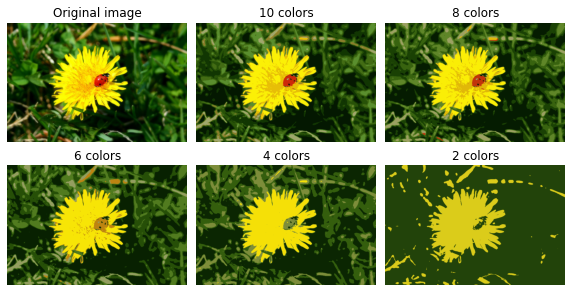

In [30]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

In [31]:
# Build Data with digits
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [33]:
# Test finding numbers using Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs",max_iter=5000, random_state=50)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=50)

In [34]:
log_reg.score(X_test, y_test)

0.9644444444444444

In [35]:
# K Means preprocess data into 50 clusters, then L Reg
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=50)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=50))])

In [36]:
pipeline.score(X_test, y_test)

0.9755555555555555

In [37]:
# GridSearchCV to find optimal clusters num

from sklearn.model_selection import GridSearchCV

# param_grid = dict(kmeans__n_clusters=range(2, 100))
param_grid = dict(kmeans__n_clusters=range(70, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ..............................kmeans__n_clusters=70; total time=   4.1s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=71; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.1s
[CV] END ..............................kmeans__n_clusters=71; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=72; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=72; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.7s
[CV] END ..............................kmeans__n_clusters=73; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=73; total time=   4.2s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=50))]),
             param_grid={'kmeans__n_clusters': range(70, 100)}, verbose=2)

In [38]:
grid_clf.best_params_

{'kmeans__n_clusters': 99}

In [39]:
grid_clf.score(X_test, y_test)

0.98

In [40]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
print(param_grid)

{'kmeans__n_clusters': range(2, 100)}


In [41]:
# clustering for semi-supervised
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=50)

In [42]:
log_reg.score(X_test, y_test)

0.7977777777777778

In [43]:
# get 50 representative images

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

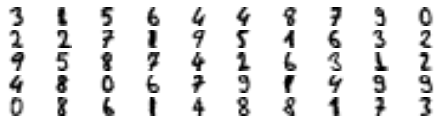

In [44]:

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [45]:
y_train[representative_digit_idx]

array([3, 1, 5, 6, 4, 4, 8, 7, 9, 0, 2, 2, 7, 1, 9, 5, 1, 6, 3, 2, 9, 5,
       8, 7, 4, 2, 6, 3, 1, 2, 4, 8, 0, 6, 7, 9, 1, 4, 9, 9, 0, 8, 6, 1,
       4, 8, 8, 1, 7, 3])

In [46]:
y_representative_digits = np.array([
    8, 0, 2, 3, 7, 9, 4, 6, 1, 7, 
    5, 1, 6, 9, 9, 8, 9, 4, 9, 1, 
    7, 1, 2, 0, 5, 1, 5, 8, 7, 6, 
    4, 4, 2, 5, 3, 7, 1, 3, 8, 6, 
    6, 0, 0, 3, 1, 4, 9, 8, 2, 0])

In [47]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
#     print(y_representative_digits[i])
#     print(y_train_propagated[kmeans.labels_==i])

In [48]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.044444444444444446

In [49]:
# propagate labels to 20% of closest instances to centroids instead of all
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
#     print(cluster_dist)
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
#     print(cutoff_distance)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)

In [50]:
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [51]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=50)

In [52]:
log_reg.score(X_test, y_test)

0.024444444444444446